<a href="https://colab.research.google.com/github/Schwarzam/Testes-Deep-Learning/blob/master/dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/trainsets/train.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-25 13:15:29--  https://storage.googleapis.com/trainsets/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.74.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>] 543.16M  81.7MB/s    in 7.8s    

2020-07-25 13:15:38 (69.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [569546721/569546721]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cats-dogs/')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats-dogs/train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


try:
  os.mkdir(train_dir)
  os.mkdir(validation_dir)
  os.mkdir(train_cats_dir)
  os.mkdir(train_dogs_dir)
  os.mkdir(validation_cats_dir)
  os.mkdir(validation_dogs_dir)
except:
  pass

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(base_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [29]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [32]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Epoch 1/15
 - 22s - loss: 0.6939 - acc: 0.5145 - val_loss: 0.6811 - val_acc: 0.5980
Epoch 2/15
 - 20s - loss: 0.6820 - acc: 0.5515 - val_loss: 0.5711 - val_acc: 0.5250
Epoch 3/15
 - 19s - loss: 0.6733 - acc: 0.5860 - val_loss: 0.7912 - val_acc: 0.5090
Epoch 4/15
 - 20s - loss: 0.6526 - acc: 0.6120 - val_loss: 0.7670 - val_acc: 0.6040
Epoch 5/15
 - 19s - loss: 0.6403 - acc: 0.6290 - val_loss: 0.5983 - val_acc: 0.6520
Epoch 6/15
 - 20s - loss: 0.6268 - acc: 0.6420 - val_loss: 0.6816 - val_acc: 0.6490
Epoch 7/15
 - 19s - loss: 0.6050 - acc: 0.6755 - val_loss: 0.6896 - val_acc: 0.6840
Epoch 8/15
 - 20s - loss: 0.6035 - acc: 0.6725 - val_loss: 0.5560 - val_acc: 0.6800
Epoch 9/15
 - 20s - loss: 0.6054 - acc: 0.6645 - val_loss: 0.5204 - val_acc: 0.6830
Epoch 10/15
 - 19s - loss: 0.5981 - acc: 0.6745 - val_loss: 0.4934 - val_acc: 0.6900
Epoch 11/15
 - 20s - loss: 0.5914 - acc: 0.6725 - val_loss: 0.6185 - val_acc: 0.6590
Epoch 12/15
 - 19s - loss: 0.5944 - acc: 0.6750 - val_loss: 0.6221 - val_a

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

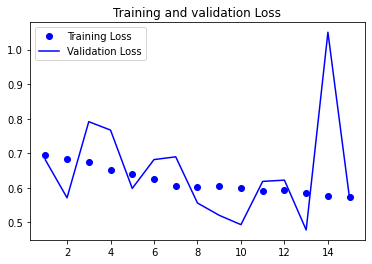

In [35]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

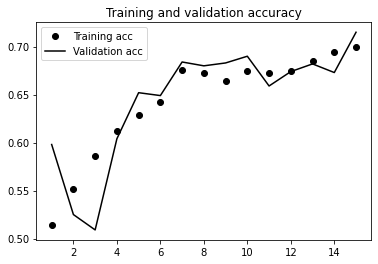

In [36]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [62]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/My Drive/TrainSets/Cats-dogs-model")

In [65]:
reconstructed_model = models.load_model("/content/drive/My Drive/TrainSets/Cats-dogs-model")

In [ ]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)

In [76]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      